<a href="https://colab.research.google.com/github/Ferinarizky4/Random-Forest-to-Predict-Temperature-/blob/main/5_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install basemap

In [ ]:
pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap

In [ ]:
dataset = pd.read_csv('/content/Data gabungan paling fix.csv', sep = ';')

In [ ]:
dataset

,longitude,latitude,u10,v10,d2m,msl,sst,sp,t2m
0,94.00,-7.0,3.600056,-2.937379,297.79465,101084.260,302.06366,101086.060,28.24515
1,94.00,-7.0,7.414926,0.831597,297.30730,101113.430,302.25952,101114.984,27.95984
2,94.00,-7.0,3.756817,3.024742,296.69177,101128.625,302.18216,101130.984,28.57877
3,94.00,-7.0,3.647230,1.409731,296.59930,101127.510,302.31130,101129.760,28.64078
4,94.00,-7.0,2.429433,-0.900645,297.19824,101142.945,302.51346,101144.220,27.29697
...,...,...,...,...,...,...,...,...,...
795712,106.75,7.0,-7.701080,-9.126024,296.34300,101552.195,299.75806,101556.980,26.49728
795713,106.75,7.0,-7.856068,-8.507150,296.16922,101423.940,299.60720,101428.550,26.08310
795714,106.75,7.0,-7.321172,-7.089899,296.09560,101447.310,299.38232,101452.150,26.34530
795715,106.75,7.0,-6.180976,-4.982381,296.63754,101368.990,299.42560,101373.375,26.53850


In [ ]:
frn = dataset.drop(columns = ['t2m'])
frn

,longitude,latitude,u10,v10,d2m,msl,sst,sp
0,94.00,-7.0,3.600056,-2.937379,297.79465,101084.260,302.06366,101086.060
1,94.00,-7.0,7.414926,0.831597,297.30730,101113.430,302.25952,101114.984
2,94.00,-7.0,3.756817,3.024742,296.69177,101128.625,302.18216,101130.984
3,94.00,-7.0,3.647230,1.409731,296.59930,101127.510,302.31130,101129.760
4,94.00,-7.0,2.429433,-0.900645,297.19824,101142.945,302.51346,101144.220
...,...,...,...,...,...,...,...,...
795712,106.75,7.0,-7.701080,-9.126024,296.34300,101552.195,299.75806,101556.980
795713,106.75,7.0,-7.856068,-8.507150,296.16922,101423.940,299.60720,101428.550
795714,106.75,7.0,-7.321172,-7.089899,296.09560,101447.310,299.38232,101452.150
795715,106.75,7.0,-6.180976,-4.982381,296.63754,101368.990,299.42560,101373.375


In [ ]:
tmp = dataset['t2m']
tmp

,t2m
0,28.24515
1,27.95984
2,28.57877
3,28.64078
4,27.29697
...,...
795712,26.49728
795713,26.08310
795714,26.34530
795715,26.53850


In [ ]:
from sklearn.model_selection import train_test_split

train_frn, test_frn, train_tmp, test_tmp = train_test_split(frn, tmp, test_size = 0.25, random_state = 42)

In [ ]:
print('Training frn Shape:', train_frn.shape)
print('Training tmp Shape:', train_tmp.shape)
print('Testing frn Shape:', test_frn.shape)
print('Testing tmp Shape:', test_tmp.shape)

Training frn Shape: (596787, 8)
Training tmp Shape: (596787,)
Testing frn Shape: (198930, 8)
Testing tmp Shape: (198930,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200, random_state = 42)

In [ ]:
train_frn

,longitude,latitude,u10,v10,d2m,msl,sst,sp
457640,100.75,-3.50,0.777083,2.063825,297.99002,100728.180,303.44656,100672.92
295697,102.75,-1.50,0.684194,-0.793928,299.59634,100598.820,0.00000,99548.11
24402,105.50,-3.25,1.654339,-0.548026,299.02112,100950.810,0.00000,100841.42
455338,95.00,-4.25,-2.844088,0.129069,297.98035,100916.630,303.21188,100914.32
237972,104.75,3.00,-3.284342,-6.485159,297.28842,100931.940,301.32666,100932.20
...,...,...,...,...,...,...,...,...
259178,102.25,6.50,-3.817764,-2.323459,297.52158,101243.560,301.92215,101272.54
365838,104.25,-4.75,0.531237,0.000013,297.46967,100891.070,0.00000,95154.39
131932,105.00,0.00,-0.570426,-8.488884,297.54880,101042.820,301.67480,100961.44
671155,95.75,0.50,1.111934,-1.285045,297.04758,101232.734,302.89038,101241.27


In [ ]:
train_tmp

,t2m
457640,29.82648
295697,31.61383
24402,29.01025
455338,27.78787
237972,27.46954
...,...
259178,28.03885
365838,25.53528
131932,26.94528
671155,27.98193


In [ ]:
rf.fit(train_frn, train_tmp);

In [ ]:
pred = rf.predict(test_frn)
print(len(pred))

198930


In [ ]:
dataset.fillna(0, inplace = True)

In [ ]:
preds = np.round(pred)
print(pred)

[28.856091   27.5022686  30.0794491  ... 28.4025548  28.74867915
 28.75494785]


In [ ]:
errors = abs(pred - test_tmp)
percenterror = np.mean(errors)
print('Mean Absolute Errror:', round(percenterror, 2), 'degrees')

Mean Absolute Errror: 0.39 degrees


In [ ]:
from sklearn.metrics import(mean_absolute_error, mean_absolute_percentage_error)
print('MAE:', mean_absolute_error(test_tmp, pred))
print('MAPE:', mean_absolute_percentage_error(test_tmp, pred))

MAE: 0.3916721331174282
MAPE: 0.01413691287260974


In [ ]:
from sklearn.metrics import accuracy_score

mae = 100*(errors/test_tmp)
accuracy = 100 - percenterror
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 99.61 %


In [ ]:
mape = 100*(errors/test_tmp)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 98.59 %


In [ ]:
frn1 = np.asarray(test_frn)
tmp1 = np.asarray(test_tmp)

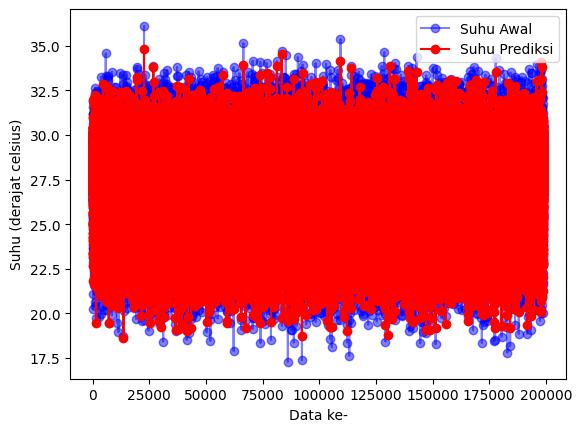

In [ ]:
plt.plot(tmp1, '-ob', label = 'Suhu Awal', alpha = 0.5)
plt.plot(pred, '-or', label = 'Suhu Prediksi')
plt.xlabel('Data ke-')
plt.ylabel('Suhu (derajat celsius)')

plt.legend()
plt.show()

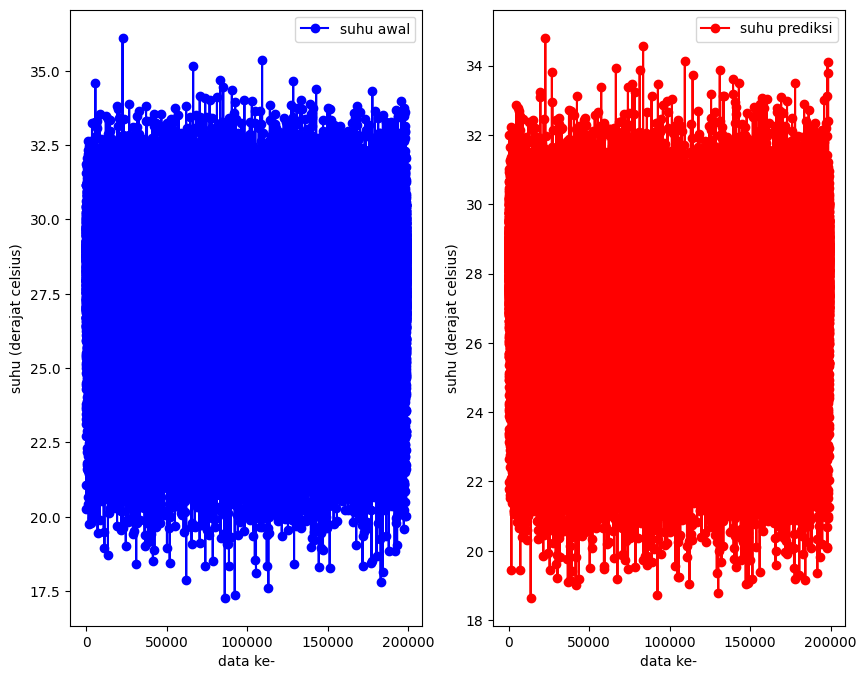

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(121)
plt.plot(tmp1, '-ob', label = 'suhu awal')
plt.legend()
plt.xlabel('data ke-')
plt.ylabel('suhu (derajat celsius)')

plt.subplot(122)
plt.plot(pred, '-or', label = 'suhu prediksi')
plt.legend()
plt.xlabel('data ke-')
plt.ylabel('suhu (derajat celsius)')
plt.show()

In [ ]:
lon = dataset.longitude
lat = dataset.latitude
u_10 = dataset.u10
v_10 = dataset.v10

In [ ]:
wu = test_frn.u10
wv = test_frn.v10

In [ ]:
ws = np.sqrt(wu**2 + wv**2)

In [ ]:
lon1 = test_frn['longitude']
lon1_ = np.asarray(lon1)
lat1 = test_frn['latitude']
lat1_ = np.asarray((lat1))

In [ ]:
from scipy.stats import norm

In [ ]:
#tmp1d = sum(norm(i).pdf(tmp1)for i in tmp1)

KeyboardInterrupt: 

In [ ]:
print(lon1_.shape)
print(lat1_.shape)

(198930,)
(198930,)


In [ ]:
print(tmp1.shape)

(198930,)


In [ ]:
xi = np.linspace(95,106,len(lon1_))
yi = np.linspace(-6,6, len(lat1_))
xi, yi = np.meshgrid(xi, yi)

In [ ]:
from scipy.interpolate import griddata

In [ ]:
zi = griddata((lon1_,lat1_),tmp1,(xi,yi), method = 'linear')

In [ ]:
print(zi.shape)
print(xi.shape)
print(yi.shape)

(143977,)
(143977,)
(143977,)


In [ ]:
plt.contourf(xi, yi, zi)

In [ ]:
# rfa = Basemap(projection = 'cyl', llcrnrlon = 95, llcrnrlat = -6, urcrnrlon = 106, urcrnrlat = 6, resolution = 'i')
# rfa.drawcoastlines(1)
# rfa.drawcountries()

# parallels = np.arange(-6, 6 + 0.25, 3)
# rfa.drawparallels(parallels, labels = [1,0,0,0], linewidth = 0.5)
# meridians = np.arange(95, 106 + 0.25, 3)
# rfa.drawmeridians(meridians, labels = [0,0,0,1], linewidth = 0.5)

# # plt.scatter(lon1_, lat1_, c = tmp1, alpha = 0.5, cmap = 'jet')
# cf = plt.contourf(lon,lat,tmp1, cmap ='jet')
# cb = plt.colorbar(fraction = 0.04, pad = 0.02)
# plt.clim(18,34)
# cb.set_label('  \u00b0C', fontsize = 12, rotation = 0)
# plt.title('Actual Temperature Map in Sumatera 2024')

Text(0.5, 1.0, 'Temperature Prediction in Sumatera 2024')

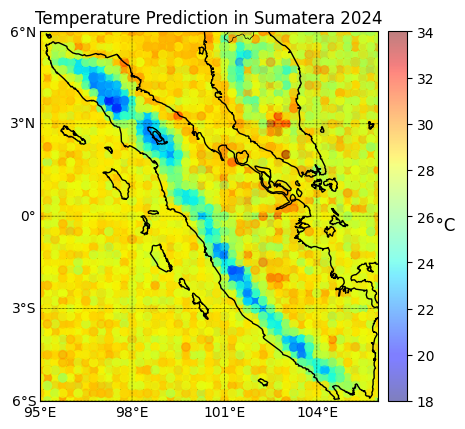

In [ ]:
rfp = Basemap(projection = 'cyl', llcrnrlon = 95, llcrnrlat = -6, urcrnrlon = 106, urcrnrlat = 6, resolution = 'i')
rfp.drawcoastlines(1)
rfp.drawcountries()

parallels = np.arange(-6, 6 + 0.25, 3)
rfp.drawparallels(parallels, labels = [1,0,0,0], linewidth = 0.5)
merdians = np.arange(95, 106 + 0.25, 3)
rfp.drawmeridians(meridians, labels = [0,0,0,1], linewidth = 0.5)

plt.scatter(lon1_, lat1_, c = pred, alpha = 0.5, cmap = 'jet')
cbp = plt.colorbar(fraction = 0.04, pad = 0.02)
plt.clim(18,34)
cbp.set_label('  \u00b0C', fontsize = 12, rotation = 0)
plt.title('Temperature Prediction in Sumatera 2024')

Text(0.5, 1.0, 'Windspeed Prediction in Sumatera 2024')

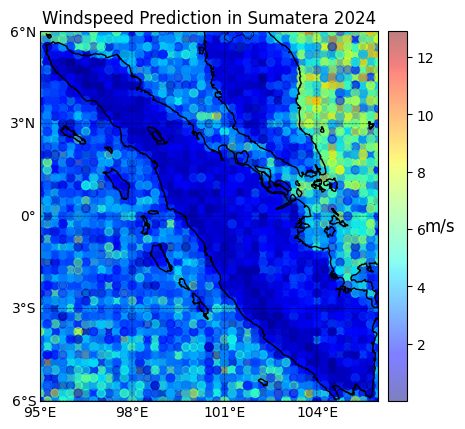

In [ ]:
rfp = Basemap(projection = 'cyl', llcrnrlon = 95, llcrnrlat = -6, urcrnrlon = 106, urcrnrlat = 6, resolution = 'i')
rfp.drawcoastlines(1)
rfp.drawcountries()

parallels = np.arange(-6, 6 + 0.25, 3)
rfp.drawparallels(parallels, labels = [1,0,0,0], linewidth = 0.5)
merdians = np.arange(95, 106 + 0.25, 3)
rfp.drawmeridians(meridians, labels = [0,0,0,1], linewidth = 0.5)

plt.scatter(lon1_, lat1_, c = ws, alpha = 0.5, cmap = 'jet')
cbp = plt.colorbar(fraction = 0.04, pad = 0.02)
cbp.set_label('m/s', fontsize = 12, rotation = 0)
plt.title('Windspeed Prediction in Sumatera 2024')

In [ ]:
May= pd.read_csv('/content/May Sumatera (1).csv')
May

,longitude,latitude,time,u10,v10,d2m,t2m,msl,sst,sp
0,95.0,6.0,2024-05-01 10:00:00,2.438626,1.127444,298.64926,301.39285,100537.875,303.82100,100463.440
1,95.0,6.0,2024-05-01 11:00:00,2.383548,-0.183807,298.62915,301.43445,100502.695,303.82100,100428.280
2,95.0,6.0,2024-05-01 12:00:00,2.178630,0.019817,298.58090,301.69528,100567.580,303.82100,100492.420
3,95.0,6.0,2024-05-02 10:00:00,3.152929,2.712449,298.77914,302.28530,100547.630,303.76367,100473.305
4,95.0,6.0,2024-05-02 11:00:00,2.995563,2.759818,298.77760,302.32208,100610.570,303.76367,100535.590
...,...,...,...,...,...,...,...,...,...,...
205060,106.0,-6.0,2024-05-30 11:00:00,-0.005674,-0.220717,298.65747,302.27502,100847.180,NaN,99975.600
205061,106.0,-6.0,2024-05-30 12:00:00,-0.164066,0.256968,298.76862,302.10394,100923.950,NaN,100050.840
205062,106.0,-6.0,2024-05-31 10:00:00,-0.782923,-0.399734,298.79730,303.30212,100876.880,NaN,100005.200
205063,106.0,-6.0,2024-05-31 11:00:00,-1.032656,0.613156,299.13150,302.15747,100952.380,NaN,100079.210


In [ ]:
dataset2 = May.drop(columns = ['time'])
dataset2

,longitude,latitude,u10,v10,d2m,t2m,msl,sst,sp
0,95.0,6.0,2.438626,1.127444,298.64926,301.39285,100537.875,303.82100,100463.440
1,95.0,6.0,2.383548,-0.183807,298.62915,301.43445,100502.695,303.82100,100428.280
2,95.0,6.0,2.178630,0.019817,298.58090,301.69528,100567.580,303.82100,100492.420
3,95.0,6.0,3.152929,2.712449,298.77914,302.28530,100547.630,303.76367,100473.305
4,95.0,6.0,2.995563,2.759818,298.77760,302.32208,100610.570,303.76367,100535.590
...,...,...,...,...,...,...,...,...,...
205060,106.0,-6.0,-0.005674,-0.220717,298.65747,302.27502,100847.180,NaN,99975.600
205061,106.0,-6.0,-0.164066,0.256968,298.76862,302.10394,100923.950,NaN,100050.840
205062,106.0,-6.0,-0.782923,-0.399734,298.79730,303.30212,100876.880,NaN,100005.200
205063,106.0,-6.0,-1.032656,0.613156,299.13150,302.15747,100952.380,NaN,100079.210


In [ ]:
dataset2.fillna(0, inplace = True)

In [ ]:
dataset2.dropna(axis = 0, inplace=True)

In [ ]:
frn2 = dataset2.drop(columns = ['t2m'])
frn2

,longitude,latitude,u10,v10,d2m,msl,sst,sp
0,95.0,6.0,2.438626,1.127444,298.64926,100537.875,303.82100,100463.440
1,95.0,6.0,2.383548,-0.183807,298.62915,100502.695,303.82100,100428.280
2,95.0,6.0,2.178630,0.019817,298.58090,100567.580,303.82100,100492.420
3,95.0,6.0,3.152929,2.712449,298.77914,100547.630,303.76367,100473.305
4,95.0,6.0,2.995563,2.759818,298.77760,100610.570,303.76367,100535.590
...,...,...,...,...,...,...,...,...
205060,106.0,-6.0,-0.005674,-0.220717,298.65747,100847.180,0.00000,99975.600
205061,106.0,-6.0,-0.164066,0.256968,298.76862,100923.950,0.00000,100050.840
205062,106.0,-6.0,-0.782923,-0.399734,298.79730,100876.880,0.00000,100005.200
205063,106.0,-6.0,-1.032656,0.613156,299.13150,100952.380,0.00000,100079.210


In [ ]:
tmp2 = dataset2['t2m']
tmp2

,t2m
0,301.39285
1,301.43445
2,301.69528
3,302.28530
4,302.32208
...,...
205060,302.27502
205061,302.10394
205062,303.30212
205063,302.15747


In [ ]:
tmp3 = np.asarray(tmp2-273)
tmp3

array([28.39285, 28.43445, 28.69528, ..., 30.30212, 29.15747, 28.73935])

In [ ]:
pred2 = rf.predict(frn2)

In [ ]:
FR = pred2 - tmp3

In [ ]:
tmp3.std()

1.6346385162408859

In [ ]:
preds.std()

1.3980938413247455

In [ ]:
pred2. std()

1.3817570397248475

In [ ]:
FR.std()

0.9413617024208719

In [ ]:
FR.mean()

-0.004340389417989223

In [ ]:
pred2.mean()

28.595321394845545

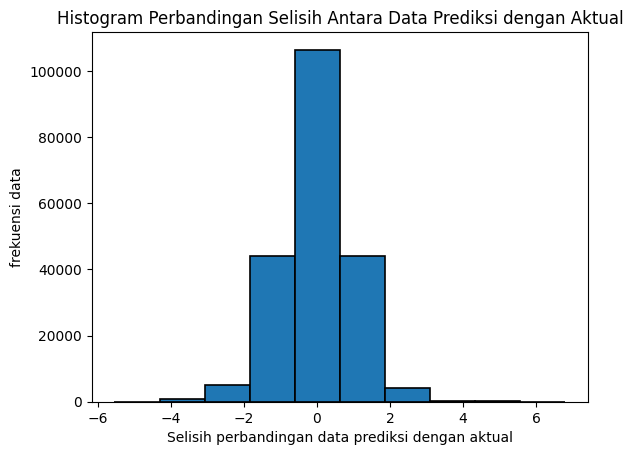

In [ ]:
plt.hist(FR, edgecolor='black', linewidth = 1.2)
plt.xlabel('Selisih perbandingan data prediksi dengan aktual')
plt.ylabel('frekuensi data')
plt.title('Histogram Perbandingan Selisih Antara Data Prediksi dengan Aktual')
plt.show()

In [ ]:
importance = rf.feature_importances_

<BarContainer object of 8 artists>

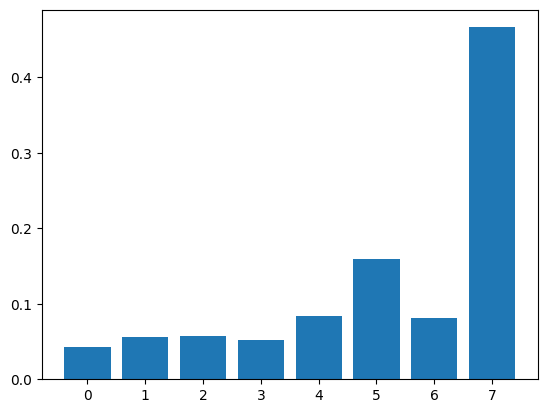

In [ ]:
plt.bar(range(frn.shape[1]), importance)

In [ ]:
pred2.shape

(205065,)

ValueError: `bins` must increase monotonically, when an array

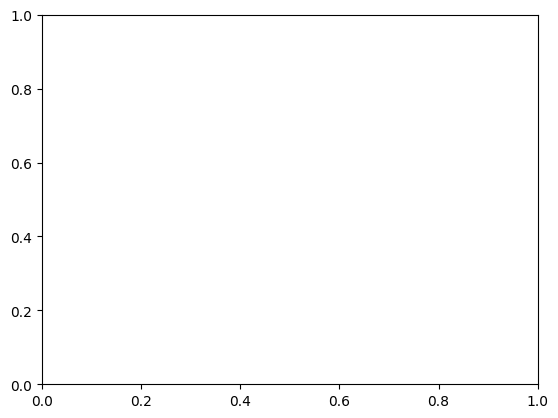

In [ ]:
# plt.plot(pred2, 'or', label = 'Prediction', alpha = 0.3)
# plt.plot(tmp3, 'og', label = 'Actual')
plt.hist(pred2,tmp3)
plt.title('Temperature Analysis using Random Forest Calculation')
plt.legend()

In [ ]:
errors1 = abs(pred2 - tmp3)
percenterror = np.mean(errors)
print('Mean Absolute Error:', round(percenterror, 2), 'degrees')

Mean Absolute Error: 0.39 degrees


In [ ]:
print('MAE:', mean_absolute_error(tmp3, pred2))
print('MAPE:', mean_absolute_percentage_error(tmp3, pred2))

MAE: 0.7252550990393293
MAPE: 0.025547556680250497


In [ ]:
MAE = 100*(errors1/tmp3)
accuracy = 100 - np.mean(errors)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 99.61 %


In [ ]:
mape = 100 * (errors1/tmp3)
accuracy = 100 - np.mean(mape)
print('accuracy:', round(accuracy, 2), '%')

accuracy: 97.45 %


In [ ]:
lon2 = dataset2.longitude
lat2 = dataset2.latitude
u10 = dataset2.u10
v10 = dataset2.v10

Text(0.5, 1.0, 'Actual Temperature Map in May 2024')

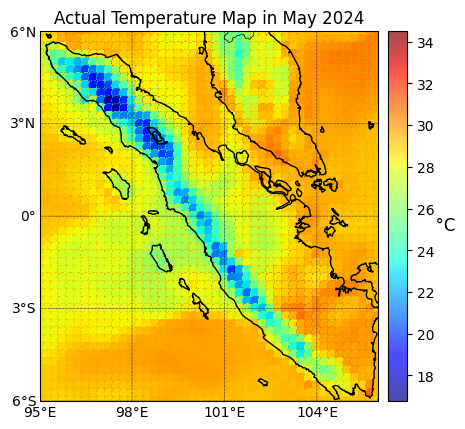

In [ ]:
rfm = Basemap(projection = 'cyl', llcrnrlon = 95, llcrnrlat = -6, urcrnrlon = 106, urcrnrlat = 6, resolution = 'i')
rfm.drawcoastlines(1)
rfm.drawcountries()

parallels = np.arange(-6, 6 + 0.25, 3)
rfm.drawparallels(parallels, labels = [1,0,0,0], linewidth = 0.5)
meridians = np.arange(95, 106 + 0.25, 3)
rfm.drawmeridians(meridians, labels = [0,0,0,1], linewidth = 0.5)

plt.scatter(lon2, lat2, c = tmp3, alpha = 0.7, cmap = 'jet')
# cfa = plt.contourf(lon2, lat2, c = tmp3, alpha = 0.3, cmap = 'jet')
cb = plt.colorbar(fraction = 0.04, pad = 0.02)
cb.set_label('  \u00b0C', fontsize = 12, rotation = 0)
plt.title('Actual Temperature Map in May 2024')

Text(0.5, 1.0, 'Temperature Prediction in Sumatera 2024')

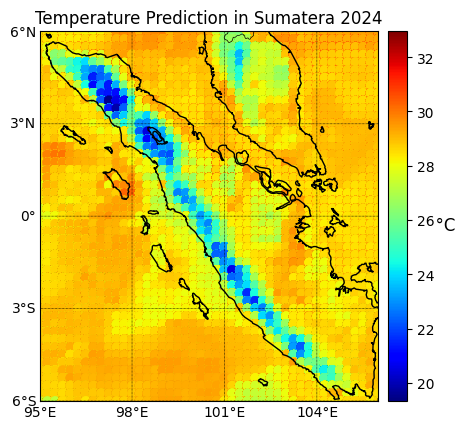

In [ ]:
rf2 = Basemap(projection = 'cyl', llcrnrlon = 95, llcrnrlat = -6, urcrnrlon = 106, urcrnrlat = 6, resolution = 'i')
rf2.drawcoastlines(1)
rf2.drawcountries()

parallels = np.arange(-6, 6 + 0.25, 3)
rf2.drawparallels(parallels, labels = [1,0,0,0], linewidth = 0.5)
merdians = np.arange(95, 106 + 0.25, 3)
rf2.drawmeridians(meridians, labels = [0,0,0,1], linewidth = 0.5)

plt.scatter(lon2, lat2, c = pred2, cmap = 'jet')
cbp = plt.colorbar(fraction = 0.04, pad = 0.02)
cbp.set_label('  \u00b0C', fontsize = 12, rotation = 0)
plt.title('Temperature Prediction in Sumatera 2024')

In [ ]:
from sklearn.tree import export_graphviz
import pydot

In [ ]:
frna = pd.DataFrame(test_frn)
frna_list = list(frn.columns)

In [ ]:
frna1 = pd.DataFrame(frn2)
frna1_list = list(frn2.columns)

In [ ]:
rf_small = RandomForestRegressor(n_estimators = 200, max_depth = 8)
rf_small.fit(train_frn, train_tmp)

RandomForestRegressor(max_depth=8, n_estimators=200)

In [ ]:
rf_small1 = RandomForestRegressor(n_estimators = 200, max_depth = 8)
rf_small1.fit(frn1, tmp1)

RandomForestRegressor(max_depth=8, n_estimators=200)

In [ ]:
treeRF1_small1 = rf.small1.estimateors_[5]

AttributeError: 'RandomForestRegressor' object has no attribute 'small1'

In [ ]:
treeRF_small = rf_small.estimators_[5]

In [ ]:
export_graphviz(treeRF_small, out_file = 'max_depth = 8RF', feature_names = frna_list, rounded = True, precision = 1)

In [ ]:
(graph, ) = pydot.graph_from_dot_file('max_depth = 8RF')

In [ ]:
graph.write_png('max_depth = 8RF.png');